In [ ]:
# Data storage:

# BisonYak
# /content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV

# Canidae
# /content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Canidae/CSV

# Capra
# /content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV

# ....
# 4079

In [ ]:
import os
import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split

import matplotlib.pyplot as plt

from multiprocessing import Pool

In [ ]:
species_all = [
    "BisonYak",
    "Hominins",
    "Leporidae",
    "Canidae",
    "Ovis",
    "Capra",
    "Cervidae",
    "Rangifer tarandus",
    "CervidaeGazellaSaiga",
    "CrocutaPanthera",
    "Rhinocerotidae",
    "Elephantidae",
    "Equidae",
    "Ursidae",
    "Felidae",
    "Vulpes vulpes"
]

final_selected = [
        "Vulpes vulpes",
        "Canidae",
        "Ursidae",
        "CrocutaPanthera",
        "Elephantidae",
        "Equidae",
        "Rhinocerotidae",
        "Rangifer tarandus",
        "Cervidae",
        "CervidaeGazellaSaiga",
        "BisonYak",
        "Capra",
        "Ovis",
        "Hominins",
        "Other"
]

In [ ]:
len(species_all)

16

In [ ]:



file_paths = []
species_file_count = {}
total_files = 0
total_size = 0
sample_size = 10  # Number of files to sample
sample_shapes = []


for i_sp in species_all:
    directory_path = f"/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/{i_sp}/CSV"
    print(directory_path)
    try:
        file_count = 0
        for root, dirs, files in os.walk(directory_path):
            for file in files:
                if file.endswith('.csv'):
                    file_path = os.path.join(root, file)
                    file_paths.append(file_path)
                    file_count += 1
                    total_files += 1
                    total_size += os.path.getsize(file_path)
        species_file_count[i_sp] = file_count
    except:
        print('CANNOT FIND ANYTHING')

print(f"Total number of files: {total_files}")
print(f"Total size of files: {total_size} bytes")
print(f"Number of files per species: {species_file_count}")


/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Hominins/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Leporidae/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Canidae/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Ovis/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Cervidae/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Rangifer tarandus/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CrocutaPanthera/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Rhinocerotidae/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1

In [ ]:
random_sample_files = random.sample(file_paths, min(sample_size, len(file_paths)))

for sample_file in random_sample_files:
    df = pd.read_csv(sample_file)
    sample_shapes.append(df.shape)

average_shape = tuple(map(lambda y: sum(y) // len(y), zip(*sample_shapes)))


In [ ]:
print(f"Average shape of sampled CSV files: {average_shape}")


Average shape of sampled CSV files: (106343, 2)


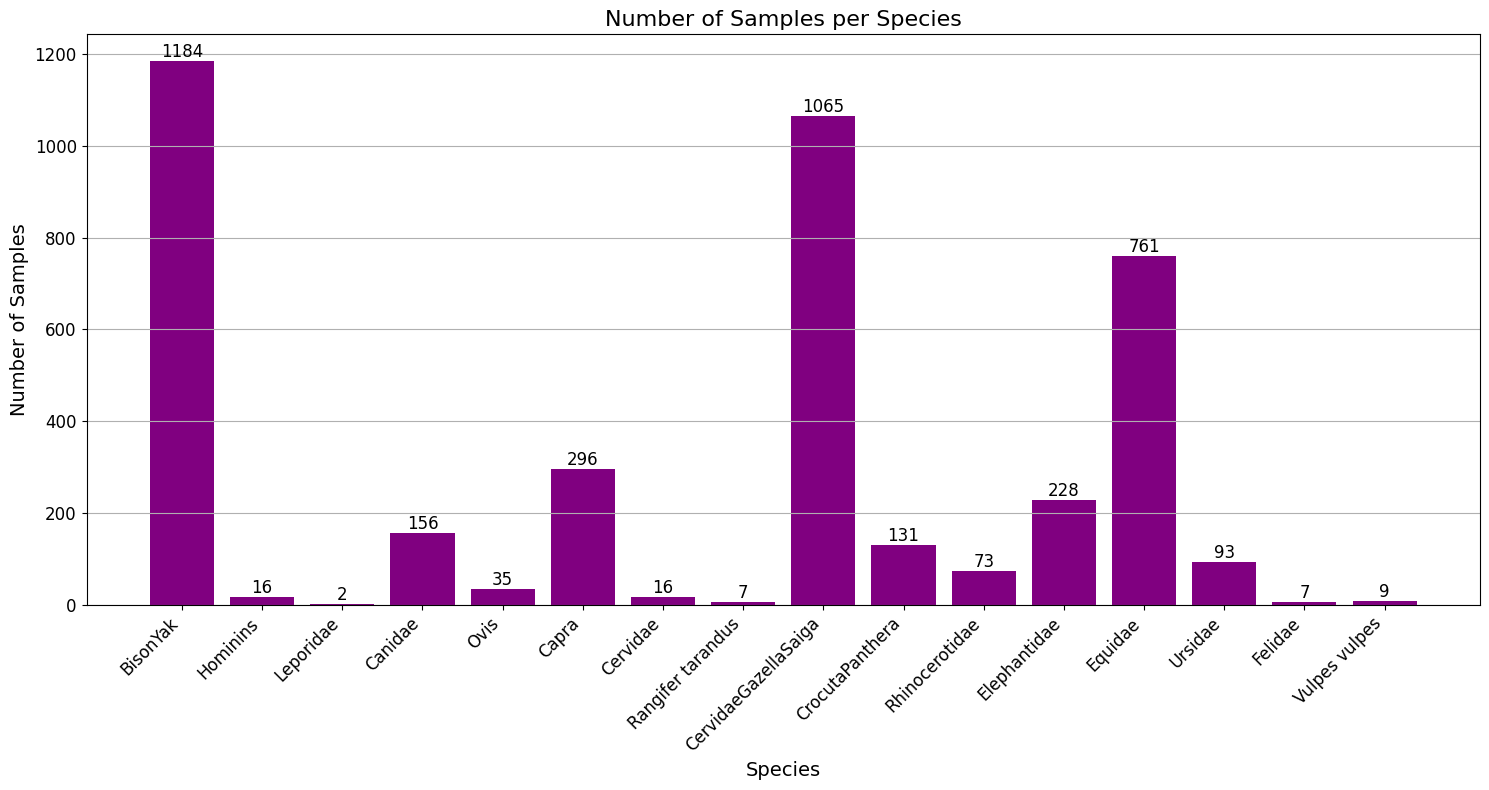

In [ ]:

plt.figure(figsize=(15, 8))
plt.bar(species_file_count.keys(), species_file_count.values(), color='purple')
plt.xlabel('Species', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.title('Number of Samples per Species', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')

# Annotate bars with the actual values
for i, (key, value) in enumerate(species_file_count.items()):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
species_all = [
    "BisonYak",
    "Hominins",
    "Leporidae",
    "Canidae",
    "Ovis",
    "Capra",
    "Cervidae",
    "Rangifer tarandus",
    "CervidaeGazellaSaiga",
    "CrocutaPanthera",
    "Rhinocerotidae",
    "Elephantidae",
    "Equidae",
    "Ursidae",
    "Felidae",
    "Vulpes vulpes"
]

In [ ]:
# final_selected = [
#         "Vulpes vulpes",
#         "Canidae",
#         "Ursidae",
#         "CrocutaPanthera",
#         "Elephantidae",
#         "Equidae",
#         "Rhinocerotidae",
#         "Rangifer tarandus",
#         "Cervidae",
#         "CervidaeGazellaSaiga",
#         "BisonYak",
#         "Capra",
#         "Ovis",
#         "Hominins",
#         "Other"
# ]

In [ ]:
set(species_all) ^ set(final_selected)

{'Felidae', 'Leporidae', 'Other'}

In [ ]:
len(final_selected)

15

In [ ]:
import os

file_paths = []

for i_sp in species_all:
    directory_path = f"/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/{i_sp}/CSV"
    print(directory_path)
    try:
        for root, dirs, files in os.walk(directory_path):
            for file in files:
                if file.endswith('.csv'):  # Check if the file has a .csv extension
                    file_paths.append(os.path.join(root, file))
    except:
        print('CANNOT FIND ANYTHING')


/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Hominins/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Leporidae/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Canidae/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Ovis/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Cervidae/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Rangifer tarandus/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CrocutaPanthera/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Rhinocerotidae/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV
/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1

In [ ]:
# import os
# from collections import defaultdict

# file_paths = []
# species_count = defaultdict(int)  # Dictionary to count the number of samples for each species

# # Count the number of samples for each species
# for i_sp in species_all:
#     directory_path = f"/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/{i_sp}/CSV"
#     try:
#         for root, dirs, files in os.walk(directory_path):
#             for file in files:
#                 if file.endswith('.csv'):
#                     species_count[i_sp] += 1
#     except:
#         print('CANNOT FIND ANYTHING')

# # Filter species based on sample count and always include "Hominins"
# selected_species = [sp for sp in species_all if species_count[sp] > 100 or sp == "Hominins"]

# # Collect file paths for selected species
# for i_sp in selected_species:
#     directory_path = f"/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/{i_sp}/CSV"
#     try:
#         for root, dirs, files in os.walk(directory_path):
#             for file in files:
#                 if file.endswith('.csv'):
#                     file_paths.append(os.path.join(root, file))
#     except:
#         print('CANNOT FIND ANYTHING')


In [ ]:
selected_species

['BisonYak',
 'Hominins',
 'Canidae',
 'Capra',
 'CervidaeGazellaSaiga',
 'CrocutaPanthera',
 'Elephantidae',
 'Equidae']

In [ ]:
len(file_paths)

4079

In [ ]:
file_paths[-1]

'/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Vulpes vulpes/CSV/FNR_DC9111_2.csv'

In [ ]:
temp_df = pd.read_csv(file_paths[29])
print(temp_df.shape)
temp_list = []
for i_value in range(1000, 3500): # Adjust the range to match the actual values
  lower_bound = i_value - 0.5
  upper_bound = i_value + 0.5
  int_mean_value = temp_df[(lower_bound < temp_df.mass) & (temp_df.mass < upper_bound)]['intensity'].mean()
  temp_list.append(int_mean_value)
print(len(temp_list))


(176981, 2)
2500


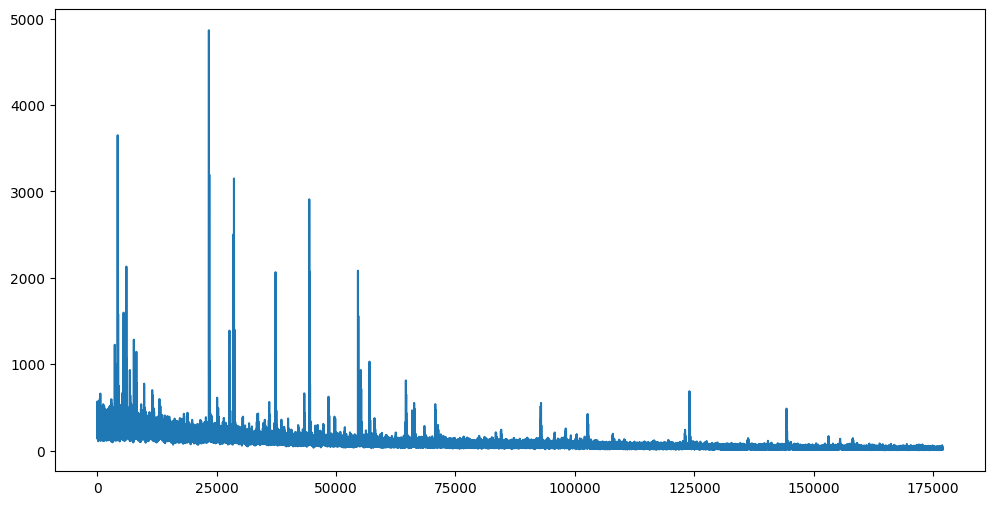

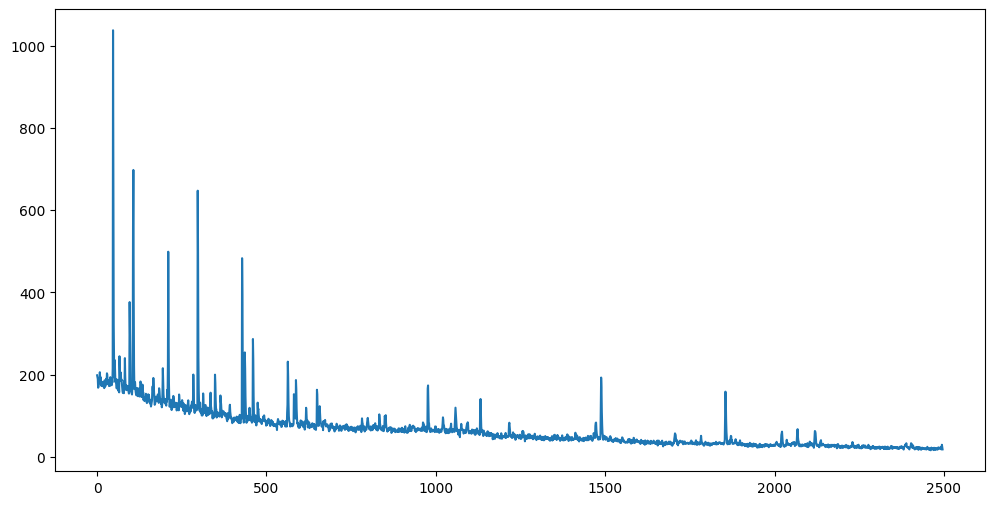

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(temp_df['intensity'].values)
plt.figure(figsize=(12, 6))
plt.plot(temp_list)

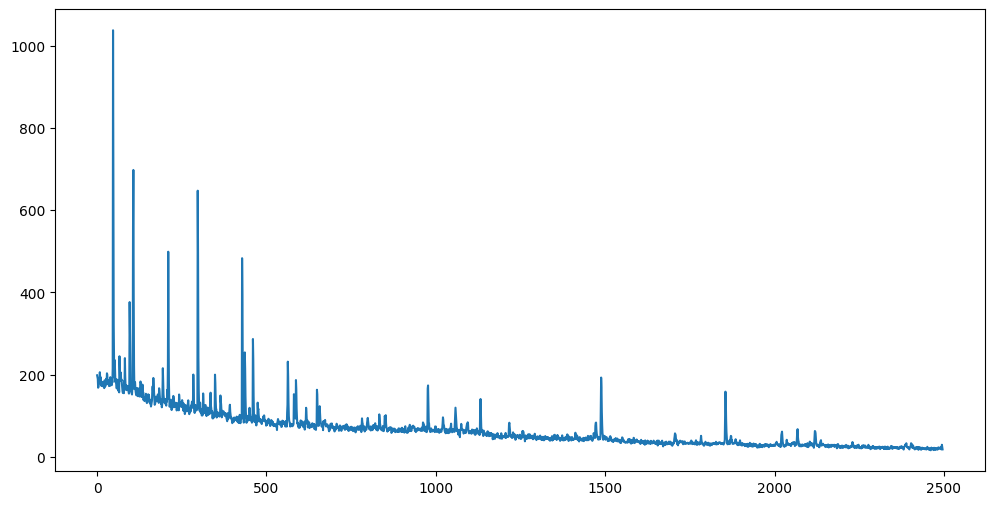

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(temp_list)

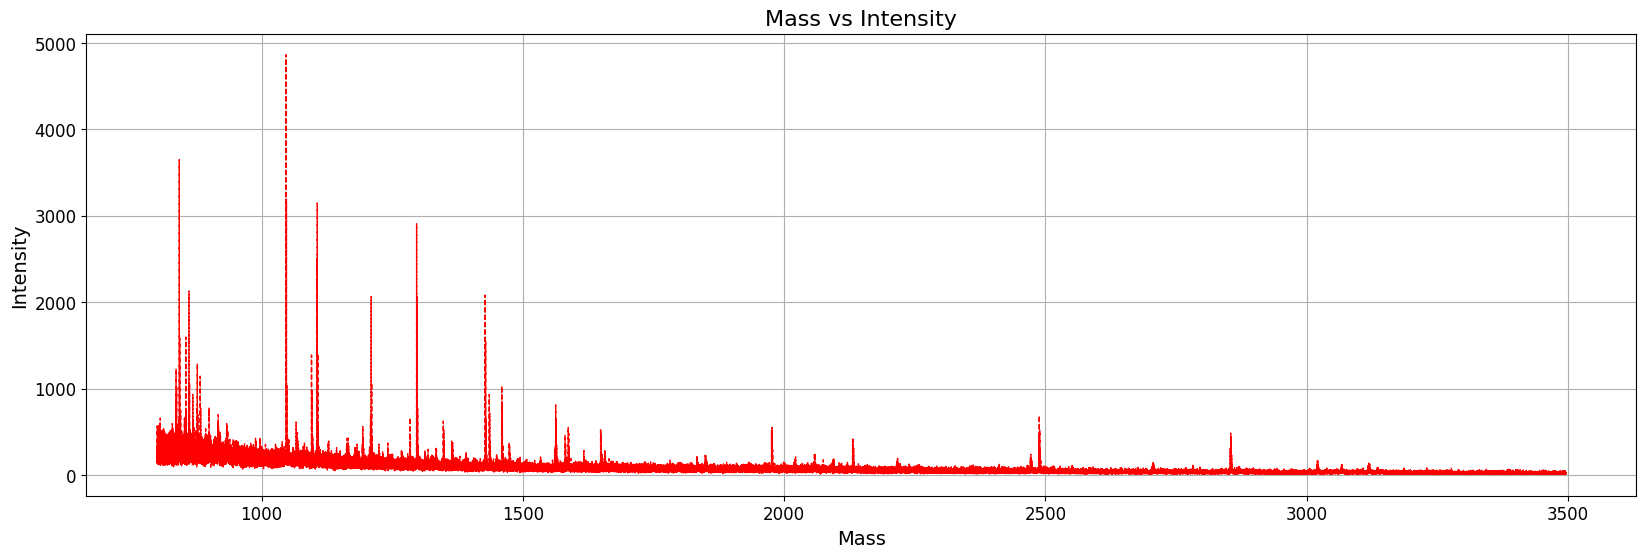

In [ ]:
plt.figure(figsize=(20, 6))
#plt.scatter(temp_df['mass'], temp_df['intensity'], c='blue', s=100, marker='o',linewidth=1)
plt.plot(temp_df['mass'], temp_df['intensity'], linestyle='--', linewidth=1, color='red')

plt.xlabel('Mass', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('Mass vs Intensity', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.show()


In [ ]:
# import numpy as np
# import pandas as pd
# from torch.utils.data import Dataset, DataLoader
# import torch

# species = selected_species

# species_to_label = {species_name: index for index, species_name in enumerate(species)}

# from multiprocessing import Pool
# from tqdm import tqdm


# from torch.utils.data import Dataset
# from multiprocessing import Pool
# import pandas as pd
# import numpy as np
# import torch

# class CustomDataset(Dataset):
#     def __init__(self, file_paths):
#         self.file_paths = file_paths
#         with Pool() as pool:
#             self.cached_data = list(pool.imap(self.process_file, self.file_paths))

#     def extract_species(self, file_path):
#         return file_path.split('/')[-3]

#     def mean_intensity(self, temp_df, i_values):
#         bins = np.arange(999.9, 3500, 0.5)
#         temp_df['bin'] = pd.cut(temp_df['mass'], bins=bins)
#         return temp_df.groupby('bin')['intensity'].mean().values

#     def process_file(self, file_path):
#         temp_df = pd.read_csv(file_path)
#         species_name = self.extract_species(file_path)
#         i_values = np.arange(1000, 3500, 0.5)
#         intensities = self.mean_intensity(temp_df, i_values)
#         return file_path, species_name, intensities

#     def __len__(self):
#         return len(self.file_paths)

#     def __getitem__(self, idx):
#         file_path, species_name, intensities = self.cached_data[idx]
#         intensities = torch.tensor(intensities, dtype=torch.float32)

#         intensities[torch.isnan(intensities)] = 0
#         mean = intensities.mean()
#         std = intensities.std()
#         intensities = (intensities - mean) / (std + torch.finfo(torch.float32).eps)

#         return species_to_label[species_name], intensities, file_path



# # Creating an instance of the custom dataset
# dataset = CustomDataset(file_paths)



In [ ]:
species_all = [
    "BisonYak",
    "Hominins",
    "Leporidae",
    "Canidae",
    "Ovis",
    "Capra",
    "Cervidae",
    "Rangifer tarandus",
    "CervidaeGazellaSaiga",
    "CrocutaPanthera",
    "Rhinocerotidae",
    "Elephantidae",
    "Equidae",
    "Ursidae",
    "Felidae",
    "Vulpes vulpes"
]

merged_group = {"Felidae": "Others", "Leporidae": "Others"}
final_selected = [merged_group.get(species, species) for species in species_all]

# Removing duplicates if any, and then creating labels
final_selected = list(set(final_selected))
species_to_label = {species_name: index for index, species_name in enumerate(final_selected)}


In [ ]:
species_all = [
    "BisonYak",
    "Hominins",
    "Leporidae",
    "Canidae",
    "Ovis",
    "Capra",
    "Cervidae",
    "Rangifer tarandus",
    "CervidaeGazellaSaiga",
    "CrocutaPanthera",
    "Rhinocerotidae",
    "Elephantidae",
    "Equidae",
    "Ursidae",
    "Felidae",
    "Vulpes vulpes"
]

# Create the list with 'Others' replacing 'Felidae' and 'Leporidae'
final_selected = ['Others' if species in ['Felidae', 'Leporidae'] else species for species in species_all]

# Create species_to_label by enumerating unique species names
final_unique_selected = list(set(final_selected))
species_to_label = {species_name: index for index, species_name in enumerate(final_unique_selected)}

# Adding specific mappings for 'Felidae' and 'Leporidae' to the label of 'Others'
species_to_label['Felidae'] = species_to_label['Others']
species_to_label['Leporidae'] = species_to_label['Others']


In [ ]:
species_to_label["Felidae"]

11

In [ ]:
species_to_label

{'Canidae': 0,
 'Cervidae': 1,
 'CervidaeGazellaSaiga': 2,
 'Ovis': 3,
 'Equidae': 4,
 'CrocutaPanthera': 5,
 'BisonYak': 6,
 'Capra': 7,
 'Ursidae': 8,
 'Vulpes vulpes': 9,
 'Elephantidae': 10,
 'Others': 11,
 'Rhinocerotidae': 12,
 'Rangifer tarandus': 13,
 'Hominins': 14,
 'Felidae': 11,
 'Leporidae': 11}

In [ ]:


# species = final_selected
# species_to_label = {species_name: index for index, species_name in enumerate(species)}

class CustomDataset(Dataset):
    def __init__(self, file_paths, bin_resolution=0.5, preprocess=True):
        self.file_paths = file_paths
        self.bin_resolution = bin_resolution
        self.preprocess = preprocess
        with Pool() as pool:
            self.cached_data = list(pool.imap(self.process_file, self.file_paths))

    def extract_species(self, file_path):
        return file_path.split('/')[-3]

    def mean_intensity(self, temp_df):
        bins = np.arange(899.9, 3500, self.bin_resolution)
        temp_df['bin'] = pd.cut(temp_df['mass'], bins=bins)
        return temp_df.groupby('bin')['intensity'].mean().values

    def process_file(self, file_path):
        temp_df = pd.read_csv(file_path)
        species_name = self.extract_species(file_path)
        if self.preprocess:
            intensities = self.mean_intensity(temp_df)
        else:
            intensities = temp_df['intensity'].values
        return file_path, species_name, intensities

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        file_path, species_name, intensities = self.cached_data[idx]
        intensities = torch.tensor(intensities, dtype=torch.float32)

        intensities[torch.isnan(intensities)] = 0
        mean = intensities.mean()
        std = intensities.std()
        intensities = (intensities - mean) / (std + torch.finfo(torch.float32).eps)

        return species_to_label[species_name], intensities, file_path

# Example usage
dataset = CustomDataset(file_paths, bin_resolution=0.5, preprocess=True)


In [ ]:
# class_counts = {}
# for label, _ in dataset:
#     if label in class_counts:
#         class_counts[label] += 1
#     else:
#         class_counts[label] = 1
# num_samples = len(dataset)
# class_weights = [num_samples/class_counts[i] for i in sorted(class_counts)]
# class_weights


In [ ]:
# batch_size = 256

# train_size = int(0.81 * len(dataset))
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)


In [ ]:
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import StratifiedShuffleSplit

# Get the labels for each data point in your dataset
labels = [species_to_label[item[1]] for item in dataset.cached_data]

# Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.19, random_state=0)
for train_index, test_index in sss.split(dataset, labels):
    train_indices, test_indices = train_index, test_index

# Create train and test datasets
train_subset = Subset(dataset, train_indices)
test_subset = Subset(dataset, test_indices)

# Create DataLoader instances
train_loader = DataLoader(train_subset, batch_size=256, shuffle=True, num_workers=4)
test_loader = DataLoader(test_subset, batch_size=256, shuffle=False, num_workers=4)


In [ ]:
# from torch.utils.data import DataLoader, random_split
# import torch

# def collate_fn(batch):
#     labels, intensities, file_paths = zip(*batch)

#     intensities = [torch.nn.functional.pad(x, (0, 111000 - x.numel())) for x in intensities]

#     #labels = torch.stack(labels)
#     intensities = torch.stack(intensities)
#     return torch.Tensor(labels), intensities, file_paths

# batch_size = 32

# # Splitting the dataset into 80% training and 20% testing
# train_size = int(0.8 * len(dataset))
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# # Using custom collate function for padding
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, collate_fn=collate_fn)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, collate_fn=collate_fn)


In [ ]:
"READY"

'READY'

In [ ]:
test_dataset[0]

(6,
 tensor([-0.0397,  1.3817, -0.0557,  ..., -0.1509, -0.1253, -0.1253]),
 '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC1818.csv')

In [ ]:
# import torch.nn as nn

# class CNN1D(nn.Module):
#     def __init__(self, input_size, num_classes):
#         super(CNN1D, self).__init__()
#         self.conv1 = nn.Conv1d(1, 16, kernel_size=5, stride=1)
#         self.conv2 = nn.Conv1d(16, 32, kernel_size=5, stride=1)
#         self.pool = nn.MaxPool1d(kernel_size=2)
#         self.fc1 = nn.Linear(32 * ((input_size - 4) // 2 - 4) // 2, 128)
#         self.fc2 = nn.Linear(128, num_classes)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.pool(self.relu(self.conv1(x)))
#         x = self.pool(self.relu(self.conv2(x)))
#         x = x.view(x.size(0), -1)
#         x = self.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x


In [ ]:
import torch.nn as nn

class CNN1D(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNN1D, self).__init__()

        self.conv1 = nn.Conv1d(1, 32, kernel_size=5, stride=1)

        self.conv2 = nn.Conv1d(32, 64, kernel_size=5, stride=1)
        #self.bn2 = nn.BatchNorm1d(32)

        self.pool = nn.AvgPool1d(kernel_size=3)

        output_size = (input_size - 5 + 1) // 3  # After conv1 and pool
        output_size = (output_size - 5 + 1) // 3  # After conv2 and pool

        self.fc1 = nn.Linear(64 * output_size, 128)
        self.dropout1 = nn.Dropout(0.25)

        self.fc2 = nn.Linear(128, num_classes)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))

        x = x.view(x.size(0), -1)

        x = self.relu(self.fc1(x))
        x = self.dropout1(x)

        x = self.fc2(x)
        return x


In [ ]:
# import torch
# import torch.nn as nn

# class DNN(nn.Module):
#     def __init__(self, input_size, num_classes):
#         super(DNN, self).__init__()
#         self.fc1 = nn.Linear(input_size, 512)
#         self.fc2 = nn.Linear(512, 64)
#         self.fc3 = nn.Linear(64, num_classes)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = x.view(x.size(0), -1)
#         x = self.relu(self.fc1(x))
#         x = self.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

In [ ]:
input_size = 5200
num_classes = 15# len(selected_species)

In [ ]:
selected_species, num_classes

(['Canidae',
  'Cervidae',
  'CervidaeGazellaSaiga',
  'Ovis',
  'Equidae',
  'CrocutaPanthera',
  'BisonYak',
  'Capra',
  'Ursidae',
  'Vulpes vulpes',
  'Elephantidae',
  'Others',
  'Rhinocerotidae',
  'Rangifer tarandus',
  'Hominins'],
 15)

In [ ]:
#species_to_label = {species_name: index for index, species_name in enumerate(selected_species)}


In [ ]:
intensities.shape


torch.Size([8, 1, 5200])

Epoch 1/10 Training:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 1/10 | Training Loss: 1.5875140657791724


Epoch 1/10 Testing:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/10 | Test Loss: 0.9245910495519638 | Test Accuracy: 77.83505154639175%


Epoch 2/10 Training:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 2/10 | Training Loss: 0.7675631734041067


Epoch 2/10 Testing:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 2/10 | Test Loss: 0.6590770483016968 | Test Accuracy: 83.6340206185567%


Epoch 3/10 Training:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 3/10 | Training Loss: 0.5221887964468735


Epoch 3/10 Testing:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 3/10 | Test Loss: 0.5216283947229385 | Test Accuracy: 86.85567010309278%


Epoch 4/10 Training:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 4/10 | Training Loss: 0.4233412123643435


Epoch 4/10 Testing:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 4/10 | Test Loss: 0.44341590255498886 | Test Accuracy: 88.14432989690722%


Epoch 5/10 Training:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 5/10 | Training Loss: 0.3594891004837476


Epoch 5/10 Testing:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 5/10 | Test Loss: 0.4345032274723053 | Test Accuracy: 88.4020618556701%


Epoch 6/10 Training:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 6/10 | Training Loss: 0.3257880348425645


Epoch 6/10 Testing:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 6/10 | Test Loss: 0.4728938713669777 | Test Accuracy: 88.65979381443299%


Epoch 7/10 Training:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 7/10 | Training Loss: 0.31332732851688677


Epoch 7/10 Testing:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 7/10 | Test Loss: 0.46104203164577484 | Test Accuracy: 87.5%


Epoch 8/10 Training:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 8/10 | Training Loss: 0.2915014773607254


Epoch 8/10 Testing:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 8/10 | Test Loss: 0.4293024316430092 | Test Accuracy: 88.4020618556701%


Epoch 9/10 Training:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 9/10 | Training Loss: 0.264307344189057


Epoch 9/10 Testing:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 9/10 | Test Loss: 0.43032338470220566 | Test Accuracy: 89.17525773195877%


Epoch 10/10 Training:   0%|          | 0/13 [00:00<?, ?it/s]

Epoch 10/10 | Training Loss: 0.2606851813884882


Epoch 10/10 Testing:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 10/10 | Test Loss: 0.4433029294013977 | Test Accuracy: 88.4020618556701%


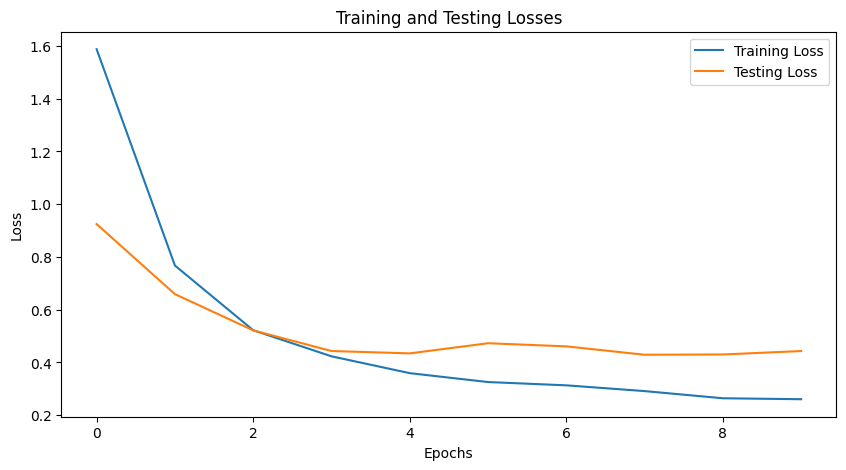

In [ ]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from torch.optim import AdamW
import torch.nn as nn

learning_rate = 0.001
epochs = 10
weight_decay_rate = 0.3

model = CNN1D(input_size, num_classes).cuda()

loss_function = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay_rate)

train_losses = []
test_losses = []



# Training
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    train_progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs} Training", leave=False)
    for species, intensities, _ in train_progress_bar:
        intensities = intensities.unsqueeze(1).cuda()
        labels = species.cuda()

        predictions = model(intensities)
        loss = loss_function(predictions, labels)

        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        train_progress_bar.set_postfix(loss=loss.item())

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f"Epoch {epoch + 1}/{epochs} | Training Loss: {train_loss}")

    # Testing
    model.eval()
    test_loss = 0.0
    correct = 0

    true_labels = []
    pred_labels = []

    test_progress_bar = tqdm(test_loader, desc=f"Epoch {epoch + 1}/{epochs} Testing", leave=False)
    with torch.no_grad():
        for species, intensities, _ in test_progress_bar:
            intensities = intensities.unsqueeze(1).cuda()
            labels = species.cuda()
            predictions = model(intensities)
            test_loss += loss_function(predictions, labels).item()

            _, predicted = torch.max(predictions.data, 1)
            correct += (predicted == labels).sum().item()

            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(predicted.cpu().numpy())

    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    accuracy = 100 * correct / test_size
    print(f"Epoch {epoch + 1}/{epochs} | Test Loss: {test_loss} | Test Accuracy: {accuracy}%")

# Plotting the losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Losses')
plt.legend()
plt.show()


In [ ]:
torch.save(model, './model.pth')


In [ ]:
species_to_label

{'Canidae': 0,
 'Cervidae': 1,
 'CervidaeGazellaSaiga': 2,
 'Ovis': 3,
 'Equidae': 4,
 'CrocutaPanthera': 5,
 'BisonYak': 6,
 'Capra': 7,
 'Ursidae': 8,
 'Vulpes vulpes': 9,
 'Elephantidae': 10,
 'Others': 11,
 'Rhinocerotidae': 12,
 'Rangifer tarandus': 13,
 'Hominins': 14,
 'Felidae': 11,
 'Leporidae': 11}

In [ ]:
sorted_keys = [k for k, v in sorted(species_to_label.items(), key=lambda item: item[1])]
sorted_keys.remove('Felidae')
sorted_keys.remove('Leporidae')
sorted_keys

['Canidae',
 'Cervidae',
 'CervidaeGazellaSaiga',
 'Ovis',
 'Equidae',
 'CrocutaPanthera',
 'BisonYak',
 'Capra',
 'Ursidae',
 'Vulpes vulpes',
 'Elephantidae',
 'Others',
 'Rhinocerotidae',
 'Rangifer tarandus',
 'Hominins']

In [ ]:
selected_species = sorted_keys

In [ ]:
len(selected_species)

15

In [ ]:
len(set(true_labels))

15

Final Classification Report:
                      precision    recall  f1-score   support

             Canidae       0.88      0.77      0.82        30
            Cervidae       0.00      0.00      0.00         3
CervidaeGazellaSaiga       0.87      0.89      0.88       202
                Ovis       0.75      0.43      0.55         7
             Equidae       0.90      0.88      0.89       145
     CrocutaPanthera       0.95      0.80      0.87        25
            BisonYak       0.92      0.97      0.95       225
               Capra       0.76      0.79      0.77        56
             Ursidae       0.84      0.89      0.86        18
       Vulpes vulpes       1.00      1.00      1.00         2
        Elephantidae       0.86      0.84      0.85        43
              Others       0.00      0.00      0.00         2
      Rhinocerotidae       0.93      0.93      0.93        14
   Rangifer tarandus       0.00      0.00      0.00         1
            Hominins       1.00      1.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


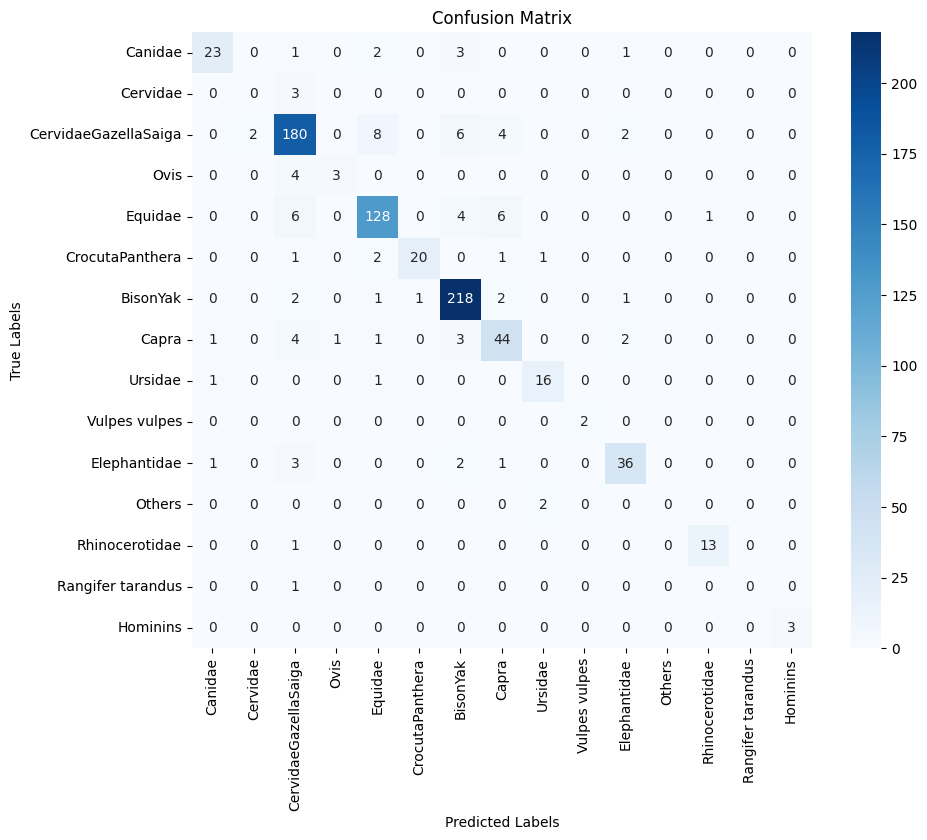

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate the classification report
print("Final Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=selected_species))

# Generate the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=selected_species, yticklabels=selected_species)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# 1.0
from sklearn.metrics import classification_report
print("Final Classification Report:")
print(classification_report(true_labels, pred_labels))

Final Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       218
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.86      0.84      0.85        38
           4       0.80      0.80      0.80         5
           5       0.89      0.74      0.81        65
           6       1.00      1.00      1.00         2
           8       0.83      0.93      0.88       205
           9       0.87      0.79      0.83        33
          10       1.00      0.84      0.91        19
          11       0.97      0.79      0.87        48
          12       0.91      0.89      0.90       162
          13       1.00      0.88      0.94        17
          14       0.00      0.00      0.00         1
          15       1.00      0.50      0.67         2

    accuracy                           0.88       817
   macro avg       0.80      0.73      0.76       8

In [ ]:
selected_species

['BisonYak',
 'Hominins',
 'Canidae',
 'Capra',
 'CervidaeGazellaSaiga',
 'CrocutaPanthera',
 'Elephantidae',
 'Equidae']

# Explainability

In [ ]:
target, input_tensor, _ = dataset.__getitem__(11+400)
target

0

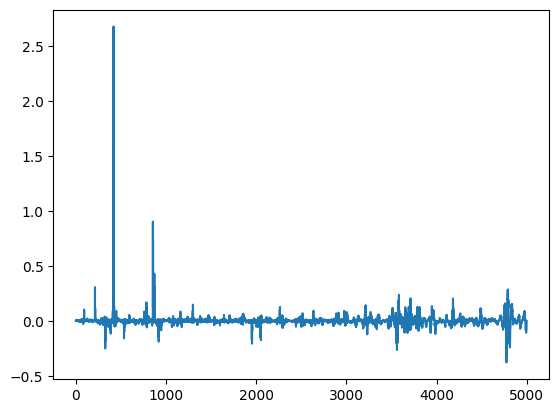

In [ ]:
plt.plot(attributions.view(-1).detach().cpu().numpy())

In [ ]:
# !pip install captum

In [ ]:
from captum.attr import IntegratedGradients

In [ ]:
torch.rand?

In [ ]:

ig = IntegratedGradients(model)

baseline = torch.rand(1, 1, input_size).cuda()*0.1  # Baseline (reference) is set to all zeros
attributions = ig.attribute(input_tensor.cuda(), baseline, target=target)

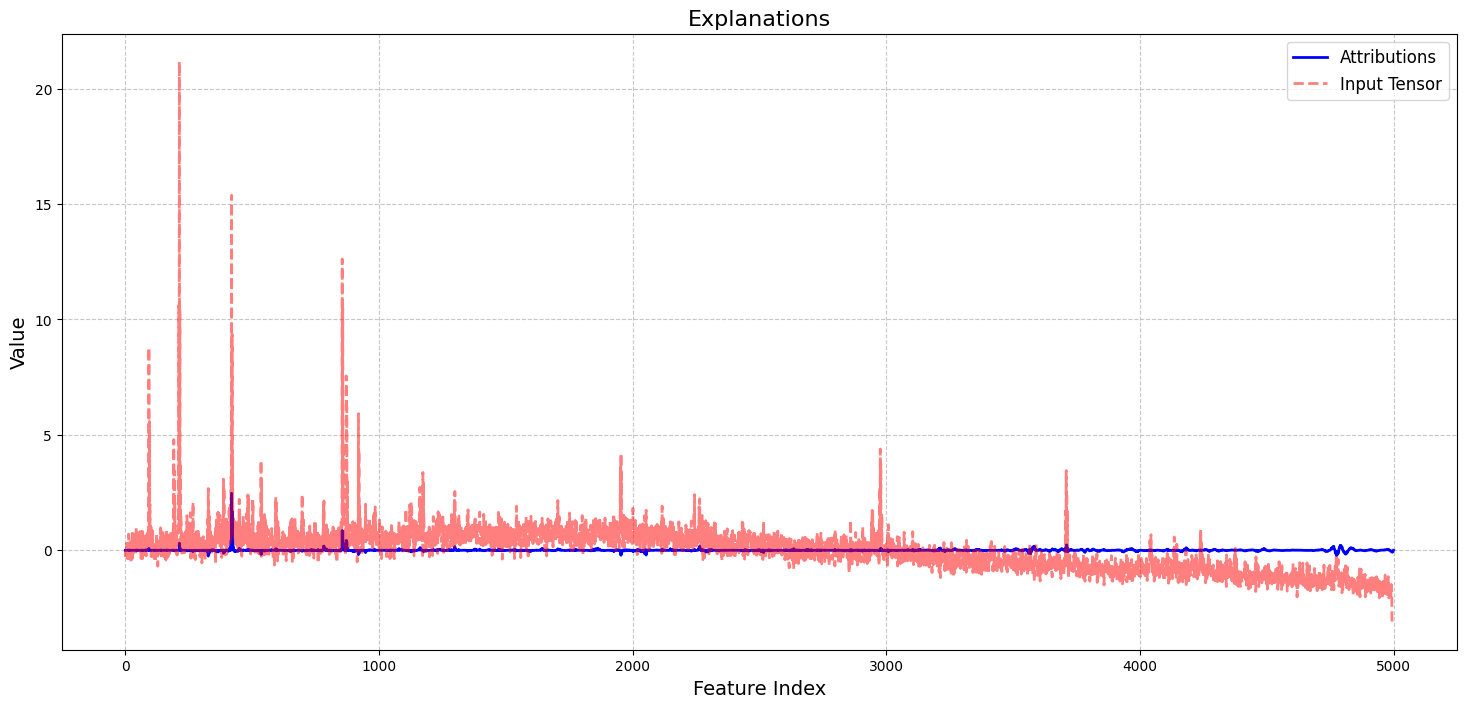

In [ ]:
import matplotlib.pyplot as plt

# Convert tensors to numpy arrays and remove singleton dimensions
attributions_np = attributions.detach().cpu().numpy().squeeze()
input_tensor_np = input_tensor.detach().cpu().numpy().squeeze()

# Create the plot
plt.figure(figsize=(18, 8))

# Plot attributions
plt.plot(attributions_np, label='Attributions', linewidth=2, color='b')

# Plot input tensor
plt.plot(input_tensor_np, label='Input Tensor', linewidth=2, linestyle='dashed', color='r', alpha=0.5)

# Add title and labels
plt.title('Explanations', fontsize=16)
plt.xlabel('Feature Index', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


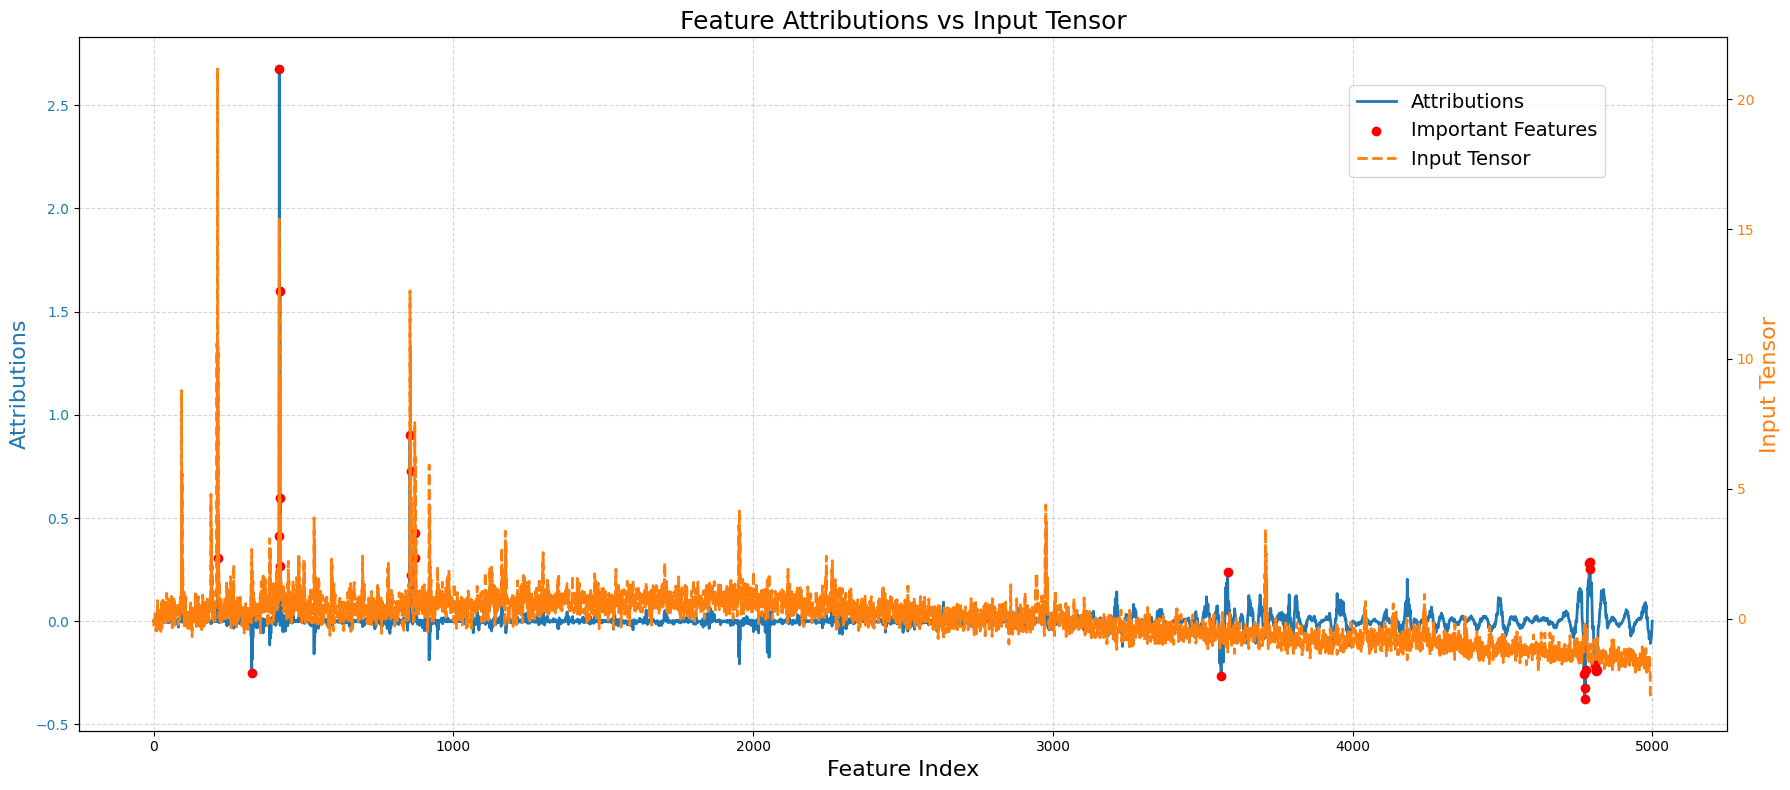

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert tensors to numpy arrays and remove singleton dimensions
attributions_np = attributions.detach().cpu().numpy().squeeze()
input_tensor_np = input_tensor.detach().cpu().numpy().squeeze()

# Create the plot
fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot attributions
color = 'tab:blue'
ax1.set_xlabel('Feature Index', fontsize=16)
ax1.set_ylabel('Attributions', color=color, fontsize=16)
ax1.plot(attributions_np, label='Attributions', linewidth=2, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.5)

# Highlight important regions in attributions
threshold = np.percentile(np.abs(attributions_np), 99.5)  # 99.9th percentile
important_regions = np.where(np.abs(attributions_np) > threshold)
ax1.scatter(important_regions, attributions_np[important_regions], color='red', zorder=5, label='Important Features')

# Add a second y-axis to plot input tensor
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Input Tensor', color=color, fontsize=16)
ax2.plot(input_tensor_np, label='Input Tensor', linewidth=2, linestyle='dashed', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Feature Attributions vs Input Tensor', fontsize=18)
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.9,0.9), fontsize=14)

# Show the plot
plt.show()


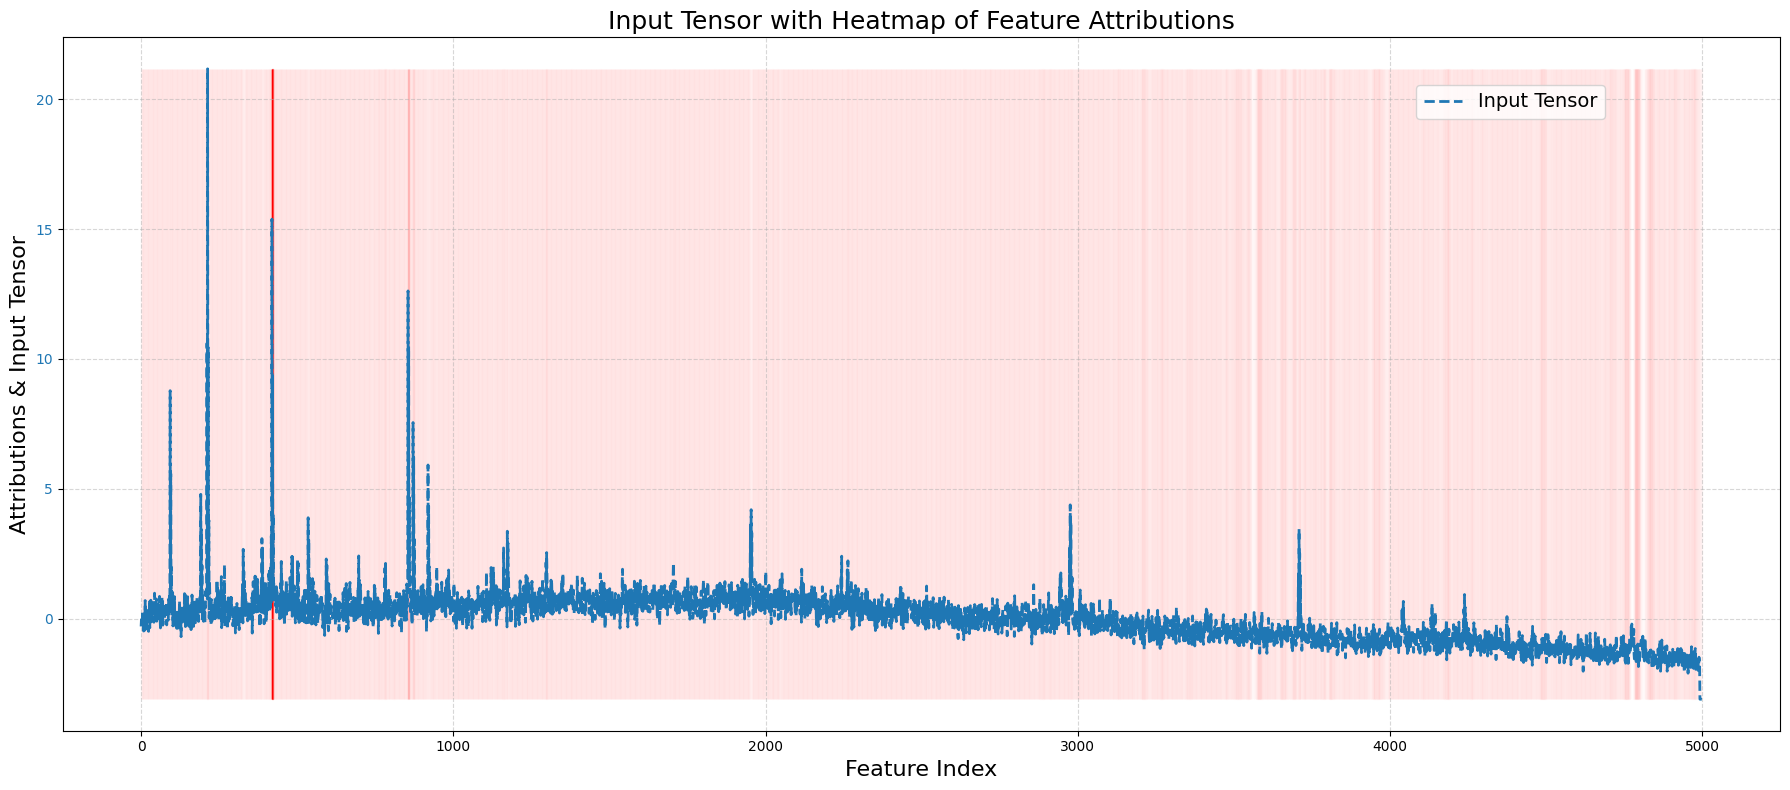

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert tensors to numpy arrays and remove singleton dimensions
attributions_np = attributions.detach().cpu().numpy().squeeze()
input_tensor_np = input_tensor.detach().cpu().numpy().squeeze()

# Create the plot
fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot input tensor
color = 'tab:blue'
ax1.set_xlabel('Feature Index', fontsize=16)
ax1.set_ylabel('Attributions & Input Tensor', fontsize=16)
ax1.plot(input_tensor_np, label='Input Tensor', linewidth=2, linestyle='dashed', color=color, zorder=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.5)

normalized_attributions = (attributions_np - np.min(attributions_np)) / (np.max(attributions_np) - np.min(attributions_np))
enhanced_attributions = normalized_attributions ** 2  # Cubing to enhance contrast

for i, val in enumerate(enhanced_attributions):
    ax1.add_patch(plt.Rectangle((i-0.5, np.min(input_tensor_np)), 1, np.max(input_tensor_np) - np.min(input_tensor_np), color=(1, 0, 0, val), zorder=1))

# Add title and legend
plt.title('Input Tensor with Heatmap of Feature Attributions', fontsize=18)
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9), fontsize=14)

# Show the plot
plt.show()


# TSNE plot

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
import numpy as np

# Initialize empty lists to hold features and labels
all_features = []
all_labels = []



for batch_labels, batch_features, _ in train_loader:
    all_features.append(batch_features.reshape(batch_features.size(0), -1))  # Flatten each batch to 2D
    all_labels.append(batch_labels)


all_features = torch.cat(all_features).numpy()
all_labels = torch.cat(all_labels).numpy()
print(all_features.shape, all_labels.shape)

# 3. Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(all_features)




(3072, 5000) (3072,)


<ipython-input-86-7057cc22bff6>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


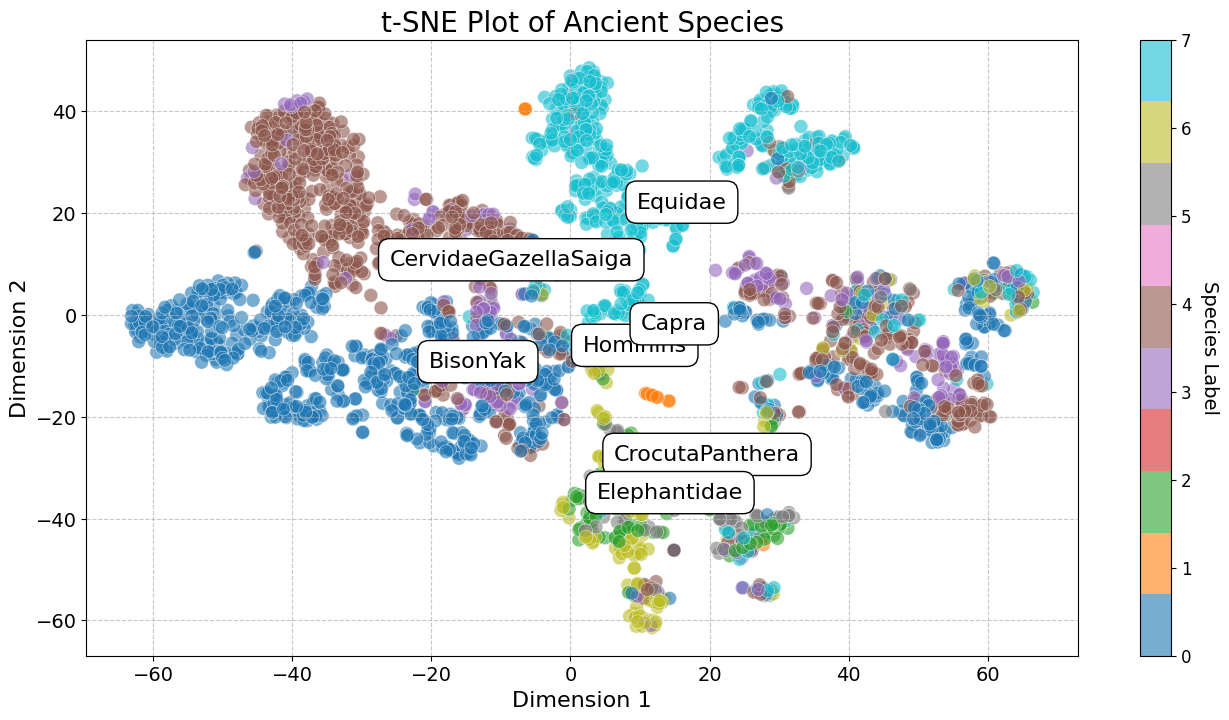

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 4. Plot
plt.figure(figsize=(16, 8))

# Custom colormap
cmap = plt.cm.get_cmap('tab10')

# Scatter plot with high-quality markers
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=all_labels, cmap=cmap, s=100, alpha=0.6, edgecolors='w', linewidths=0.5)

# Colorbar with custom ticks and labels
cbar = plt.colorbar(scatter, ticks=range(len(np.unique(all_labels))))
cbar.set_label('Species Label', rotation=270, labelpad=20, fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Annotate cluster centers
species_names = selected_species
unique_labels = np.unique(all_labels)
for i, label in enumerate(unique_labels):
    cluster_center = np.mean(tsne_results[all_labels == label], axis=0)
    plt.text(cluster_center[0], cluster_center[1], species_names[i], fontsize=16, ha='center', va='center', color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Title and Labels with custom font sizes
plt.title('t-SNE Plot of Ancient Species', fontsize=20)
plt.xlabel('Dimension 1', fontsize=16)
plt.ylabel('Dimension 2', fontsize=16)

# Custom grid
plt.grid(True, linestyle='--', alpha=0.7)

# Custom tick marks for better readability
plt.tick_params(axis='both', which='major', labelsize=14)

# Show the plot
plt.show()


# Find "difficult" sampels

In [ ]:
# # Initialize CustomDataset
# dataset = CustomDataset(file_paths)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Splitting and Training N times
N = 300
difficult_samples = []

for i in range(N):
    train_data, test_data = train_test_split(dataset, test_size=0.15, random_state=i)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=320, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=320, shuffle=False)

    # Initialize 1D CNN model, loss, and optimizer here
    model = CNN1D(5600, 8).cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters())

    model.train()
    # Train the model
    for epoch in range(20):
        correct_train = 0
        total_train = 0
        for labels, inputs, _ in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.unsqueeze(1).cuda())
            loss = criterion(outputs, labels.cuda())
            loss.backward()
            optimizer.step()

            _, predicted_train = torch.max(outputs, 1)
            correct_train += (predicted_train == labels.cuda()).sum().item()
            total_train += labels.size(0)

        train_accuracy = 100 * correct_train / total_train
        #print(f"Epoch {epoch+1}, Train Accuracy: {train_accuracy}%")

    # Test the model
    model.eval()
    correct_test = 0
    total_test = 0
    for labels, inputs, file_paths in test_loader:
        outputs = model(inputs.unsqueeze(1).cuda())
        _, predicted = torch.max(outputs, 1)
        incorrect_indices = (predicted != labels.cuda()).nonzero(as_tuple=True)[0]

        correct_test += (predicted == labels.cuda()).sum().item()
        total_test += labels.size(0)

        for idx in incorrect_indices:
            difficult_samples.append((labels[idx].item(), file_paths[idx]))

    test_accuracy = 100 * correct_test / total_test
    print(f"Test Accuracy: {test_accuracy}%")

# Store difficult_samples for analysis


Test Accuracy: 90.46793760831889%
Test Accuracy: 91.16117850953206%
Test Accuracy: 91.33448873483536%
Test Accuracy: 89.60138648180242%
Test Accuracy: 91.50779896013864%
Test Accuracy: 90.64124783362219%
Test Accuracy: 89.60138648180242%
Test Accuracy: 89.25476603119584%
Test Accuracy: 88.21490467937609%
Test Accuracy: 88.38821490467937%
Test Accuracy: 89.77469670710572%
Test Accuracy: 90.81455805892547%
Test Accuracy: 90.81455805892547%
Test Accuracy: 89.77469670710572%
Test Accuracy: 89.25476603119584%
Test Accuracy: 89.94800693240902%
Test Accuracy: 89.94800693240902%
Test Accuracy: 89.42807625649914%
Test Accuracy: 90.12131715771231%
Test Accuracy: 90.2946273830156%
Test Accuracy: 89.60138648180242%
Test Accuracy: 89.08145580589255%
Test Accuracy: 91.16117850953206%
Test Accuracy: 91.16117850953206%
Test Accuracy: 88.73483535528597%
Test Accuracy: 89.42807625649914%
Test Accuracy: 90.46793760831889%
Test Accuracy: 90.81455805892547%
Test Accuracy: 89.42807625649914%
Test Accuracy: 

In [ ]:
from collections import Counter

counted = Counter(difficult_samples)
#print(counted)

In [ ]:
repeated_tuples = [k for k,v in counted.items() if v>54]
for i in repeated_tuples:
  print(i)

(7, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0533.csv')
(3, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC1008.csv')
(6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0803.csv')
(7, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0223.csv')
(6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0403.csv')
(2, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Canidae/CSV/DC4514.csv')
(7, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0318.csv')
(0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0645.csv')
(7, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0738.csv')
(3, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC0762.csv')
(2, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_

In [ ]:
[(0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0234.csv'), (5, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CrocutaPanthera/CSV/DC0521.csv'), (7, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0533.csv'), (0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0348.csv'), (3, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC0561.csv'), (0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0341.csv'), (3, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC1008.csv'), (4, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC1837.csv'), (0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0821.csv'), (4, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0296.csv'), (6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0803.csv'), (0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0806.csv'), (6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0273.csv'), (0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0667.csv'), (0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC1007.csv'), (7, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0223.csv'), (5, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CrocutaPanthera/CSV/DC0441.csv'), (6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0403.csv'), (2, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Canidae/CSV/DC4514.csv'), (6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0963.csv'), (7, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0318.csv'), (0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0645.csv'), (3, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC0777.csv'), (3, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC0321.csv'), (0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0822.csv'), (6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0359.csv'), (6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0764.csv'), (4, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0385.csv'), (7, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0738.csv'), (3, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC0762.csv'), (0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0843.csv'), (6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0947.csv'), (7, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0719.csv'), (4, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0567.csv'), (3, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC0491.csv'), (3, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC0837.csv'), (6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0985.csv'), (4, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC653.csv'), (2, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Canidae/CSV/DC2214.csv'), (3, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC1015.csv'), (5, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CrocutaPanthera/CSV/DC2213.csv'), (3, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC0516.csv'), (3, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC0711.csv'), (4, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0331.csv'), (7, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0548.csv'), (0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC2063.csv'), (3, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC0354.csv'), (5, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CrocutaPanthera/CSV/DC0552.csv'), (0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0414.csv'), (4, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC4361.csv'), (4, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0500.csv')]


[(0,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0234.csv'),
 (5,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CrocutaPanthera/CSV/DC0521.csv'),
 (7,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0533.csv'),
 (0,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0348.csv'),
 (3,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC0561.csv'),
 (0,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0341.csv'),
 (3,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC1008.csv'),
 (4,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC1837.csv'),
 (0,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0821.csv'),
 (4,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0296.csv

In [ ]:
[(0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0300.csv'), (6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0980.csv'), (6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0996.csv'), (4, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0535.csv'), (0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0495.csv'), (4, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0400.csv'), (6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0275.csv')]


[(0,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0300.csv'),
 (6,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0980.csv'),
 (6,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0996.csv'),
 (4,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0535.csv'),
 (0,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0495.csv'),
 (4,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0400.csv'),
 (6,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0275.csv')]

[(6,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0714.csv'),
 (5,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CrocutaPanthera/CSV/DC0458.csv'),
 (3,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC0930.csv'),
 (3,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC0762.csv'),
 (4,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0977.csv'),
 (3,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC0561.csv'),
 (4,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0448.csv'),
 (4,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0500.csv'),
 (6,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC1902.csv'),
 (7,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equid

In [ ]:
[(6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0714.csv'), (4, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0977.csv'), (4, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0448.csv'), (0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0300.csv'), (7, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0299.csv'), (6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0858.csv'), (2, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Canidae/CSV/DC0492.csv'), (0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC1631.csv'), (2, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Canidae/CSV/DC0578.csv'), (5, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CrocutaPanthera/CSV/DC0486.csv'), (3, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC7800.csv'), (0, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0495.csv'), (7, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC1619.csv'), (3, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC0992.csv'), (6, '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0532.csv')]


[(6,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0714.csv'),
 (4,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0977.csv'),
 (4,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0448.csv'),
 (0,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC0300.csv'),
 (7,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0299.csv'),
 (6,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Elephantidae/CSV/DC0858.csv'),
 (2,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Canidae/CSV/DC0492.csv'),
 (0,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC1631.csv'),
 (2,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Canidae/CSV/DC0578.csv'),
 (5,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CrocutaPanthera/CS

In [ ]:
[(2,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Canidae/CSV/DC0492.csv'),
 (7,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0894.csv'),
 (7,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0297.csv')]

[(2,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Canidae/CSV/DC0492.csv'),
 (7,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0894.csv'),
 (7,
  '/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC0297.csv')]

In [ ]:
def compute_grad_hess(preds, labels, proxy_anchors, margin):
    num_data_points = len(labels)
    grad = np.zeros(num_data_points)
    hess = np.zeros(num_data_points)

    for i in range(num_data_points):
        positive_anchor = proxy_anchors[int(labels[i])]
        negative_anchors = np.delete(proxy_anchors, int(labels[i]), axis=0)

        positive_distance = np.linalg.norm(preds[i] - positive_anchor)
        negative_distances = np.linalg.norm(preds[i] - negative_anchors, axis=1)  # Define negative_distances
        negative_distance = np.min(negative_distances)  # Use the minimum negative distance

        # Compute the gradient based on the specific formulation of the Proxy Anchor Loss
        # Here we use a simple placeholder
        grad[i] = 2 * (positive_distance - negative_distance)

        # Compute the Hessian as a placeholder for the second derivative
        hess[i] = 2

    return grad, hess


In [ ]:
def proxy_anchor_loss(preds, dtrain):
    labels = dtrain.get_label()
    num_data_points = len(labels)
    grad = np.zeros(num_data_points)
    hess = np.zeros(num_data_points)

    for i in range(num_data_points):
        positive_anchor = proxy_anchors[int(labels[i])]
        negative_anchors = np.delete(proxy_anchors, int(labels[i]), axis=0)

        # Compute distances to positive and negative anchors
        positive_distance = np.linalg.norm(preds[i] - positive_anchor)
        negative_distances = np.linalg.norm(preds[i] - negative_anchors, axis=0)
        negative_distance = np.min(negative_distances)

        # Compute gradient and Hessian based on the specific formulation of the Proxy Anchor Loss
        grad[i] = 2 * (positive_distance - negative_distance) + margin
        hess[i] = 2

    return grad, hess


In [ ]:
def angular_loss(preds, dtrain):
    labels = dtrain.get_label()
    num_data_points = len(labels)
    grad = np.zeros(num_data_points)
    hess = np.zeros(num_data_points)

    for i in range(num_data_points):
        positive_anchor = proxy_anchors[int(labels[i])]
        negative_anchors = np.delete(proxy_anchors, int(labels[i]), axis=0)

        # Compute cosine similarities to positive and negative anchors
        positive_similarity = np.dot(preds[i], positive_anchor) / (np.linalg.norm(preds[i]) * np.linalg.norm(positive_anchor))
        negative_similarity = np.max([np.dot(preds[i], neg) / (np.linalg.norm(preds[i]) * np.linalg.norm(neg)) for neg in negative_anchors])

        # Compute the loss as the difference between positive and negative similarities
        loss = positive_similarity - negative_similarity

        # Compute the gradient and Hessian (second derivative) of the loss
        grad[i] = -loss
        hess[i] = 1  # Placeholder for the second derivative

    return grad, hess


In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_classes = len(np.unique(y))
num_features = X.shape[1]
margin = 1.0

# Define Proxy Anchors (e.g., randomly or using mean vectors)
proxy_anchors = np.random.rand(num_classes, num_features)


# Train XGBoost model with custom objective
params = {'max_depth': 3, 'eta': 0.1}
dtrain = xgb.DMatrix(X_train, label=y_train)
bst = xgb.train(params, dtrain, num_boost_round=10, obj=angular_loss)

# Make predictions
dtest = xgb.DMatrix(X_test)
preds = bst.predict(dtest)

# Convert predictions to class labels
preds_labels = np.round(preds).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, preds_labels)
print("Accuracy:", accuracy)


ValueError: ignored

In [ ]:
preds_labels

array([-4, -3, -4, -3, -4, -3, -4, -4, -4, -4, -3, -4, -3, -4, -4, -3, -3,
       -3, -4, -4, -3, -3, -4, -4, -3, -4, -4, -4, -3, -4, -3, -4, -3, -4,
       -3, -3, -4, -4, -3, -3, -4, -3, -4, -4, -3, -3, -4, -4, -3, -3, -4,
       -4, -4, -3, -3, -4, -4, -3, -4, -3, -3, -3, -3, -3, -3, -4, -3, -4,
       -3, -4, -3, -3, -3, -3, -4, -4, -4, -3, -3, -3, -3, -4, -3, -4, -3,
       -4, -4, -4, -4, -4, -4, -4, -3, -3, -4, -4, -3, -3, -4, -3, -4, -4,
       -3, -3, -4, -4, -3, -3, -3, -4, -4, -3, -4, -3, -3, -3, -4, -3, -3,
       -4, -4, -3, -3, -4, -4, -3, -4, -3, -4, -4, -3, -4, -4, -4, -4, -3,
       -3, -3, -4, -4, -4, -3, -4, -3, -4, -3, -4, -4, -3, -4, -3, -3, -3,
       -4, -4, -3, -3, -4, -4, -3, -3, -3, -4, -3, -3, -4, -4, -4, -4, -4,
       -3, -4, -4, -4, -4, -4, -3, -4, -3, -3, -3, -4, -4, -3, -3, -4, -4,
       -4, -3, -4, -4, -3, -3, -3, -4, -4, -4, -3, -3, -4])

In [ ]:
from torch.utils.data import DataLoader

# Creating an instance of the custom Dataset
dataset = CustomDataset(file_paths)

# Creating a DataLoader
batch_size = 8
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Example of iterating through the DataLoader
for species, intensities in dataloader:
    print(species)    # Batch of species names
    print(intensities) # Batch of intensity values
    break


Loading file: /content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Ursidae/CSV/FNR_DC9001_1.csv
Loading file: /content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Capra/CSV/DC6178.csv
Loading file: /content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC3897.csv
Loading file: /content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC0607.csv
Loading file: /content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC4779.csv
Loading file: /content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/BisonYak/CSV/DC10168.csv
Loading file: /content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/CervidaeGazellaSaiga/CSV/DC1737.csv
Loading file: /content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/Equidae/CSV/DC8309.csv
('Ursidae', 'Capra', 'BisonYak', 'CervidaeGazellaSaiga', 'Equidae', 'BisonYak', 'CervidaeGazellaSaiga', 'Equidae')
tensor([[2.9421e-04, 3.2030e-04, 3.3259e-04,  ..., 0

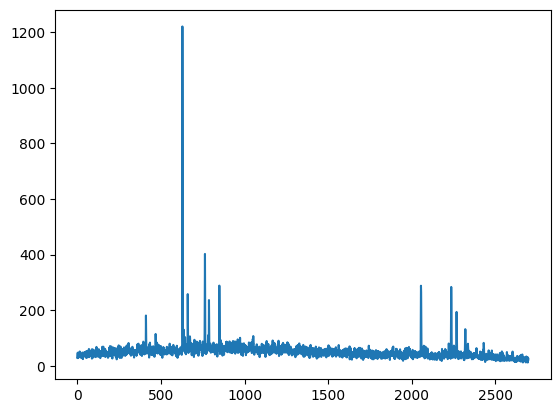

In [ ]:
plt.plot(temp_list)

In [ ]:
temp_df

,mass,intensity
0,799.899773,45
1,799.909621,31
2,799.919469,16
3,799.929317,14
4,799.939165,27
...,...,...
176976,3497.087414,19
176977,3497.108061,15
176978,3497.128709,23
176979,3497.149357,23


In [ ]:
%%time

temp_df = pd.read_csv(file_paths[0])
temp_list = []
for i_value in np.arange(800, 3500, 1): # 0.5 is the step size
  lower_bound = i_value - 0.1
  upper_bound = i_value + 0.1
  int_mean_value = temp_df[(lower_bound < temp_df.mass) & (temp_df.mass < upper_bound)]['intensity'].mean()
  temp_list.append(int_mean_value)


CPU times: user 3.22 s, sys: 22.9 ms, total: 3.24 s
Wall time: 3.52 s


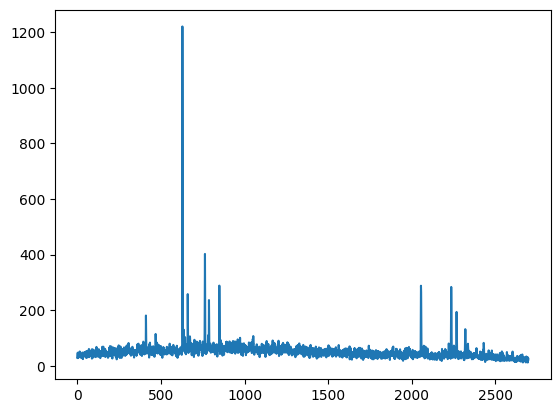

In [ ]:
plt.plot(temp_list)

In [ ]:
%%time

temp_df = pd.read_csv(file_paths[0])
i_values = np.arange(1000, 3500, 0.5)
lower_bounds = i_values - 0.1
upper_bounds = i_values + 0.1

def mean_intensity(lower, upper):
    return temp_df[(lower < temp_df.mass) & (temp_df.mass < upper)]['intensity'].mean()

temp_list = [mean_intensity(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)]


CPU times: user 6.78 s, sys: 26.2 ms, total: 6.81 s
Wall time: 7.93 s


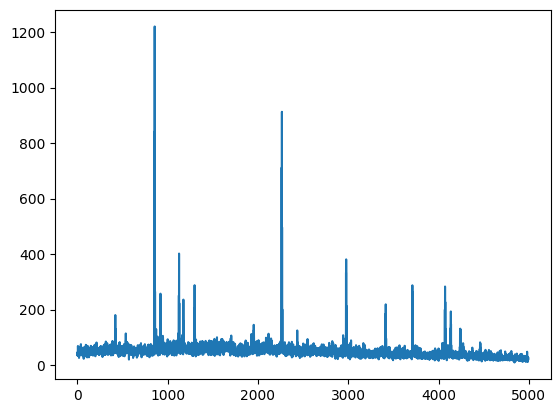

In [ ]:
plt.plot(temp_list)

In [ ]:
%%time

temp_df = pd.read_csv(file_paths[0])
i_values = np.arange(1000, 3500, 0.1)
lower_bounds = i_values - 0.1
upper_bounds = i_values + 0.1

def mean_intensity(lower, upper):
    return temp_df[(lower < temp_df.mass) & (temp_df.mass < upper)]['intensity'].mean()

temp_list = [mean_intensity(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)]


CPU times: user 28.5 s, sys: 108 ms, total: 28.6 s
Wall time: 29.1 s


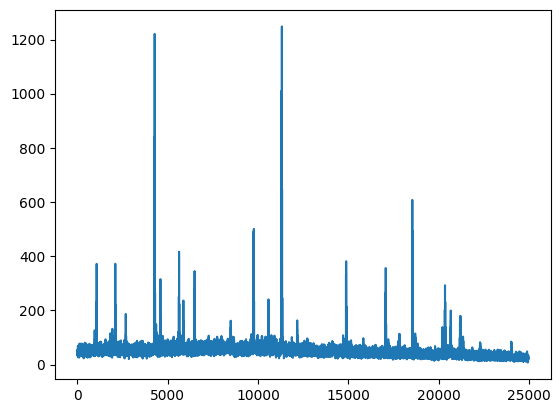

In [ ]:
plt.plot(temp_list)

KeyboardInterrupt: ignored

In [ ]:
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import os
import sys

def extract_species(file_path):
    parts = file_path.split('/')
    idx = parts.index('1_Main') + 1
    return parts[idx]

def process_file(file_path):
    print(f"Loading file: {file_path}")  # Printing the file name before loading
    temp_df = pd.read_csv(file_path)
    species_name = extract_species(file_path)
    i_values = np.arange(1000, 3500, 0.1)
    intensities = [mean_intensity(temp_df, i_value) for i_value in i_values]
    return species_name, intensities

def mean_intensity(temp_df, i_value):
    lower_bound = i_value - 0.1
    upper_bound = i_value + 0.1
    return temp_df[(lower_bound < temp_df.mass) & (temp_df.mass < upper_bound)]['intensity'].mean()

def print_progress_bar(iteration, total, bar_length=50):
    percent = int(100 * (iteration / float(total)))
    bar_filled = int(round(bar_length * iteration / float(total)))
    bar = '#' * bar_filled + '-' * (bar_length - bar_filled)
    sys.stdout.write(f'\r[{bar}] {percent}%')
    sys.stdout.flush()

# Processing all files in parallel and printing progress
results = []
for index, result in enumerate(Parallel(n_jobs=-1)(delayed(process_file)(file_path) for file_path in file_paths)):
    results.append(result)
    print_progress_bar(index + 1, len(file_paths))

print("\nProcessing complete!")

# Creating a DataFrame from the results
i_values_columns = np.arange(1000, 3500, 0.1)
columns = ['species'] + list(i_values_columns)
data = [tuple([species_name] + intensities) for species_name, intensities in results]

final_df = pd.DataFrame(data, columns=columns)


KeyboardInterrupt: ignored

In [ ]:
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import os
import sys

def extract_species(file_path):
    parts = file_path.split('/')
    idx = parts.index('1_Main') + 1
    return parts[idx]

def process_file(file_path):
    print(f"Loading file: {file_path}")  # Printing the file name before loading
    temp_df = pd.read_csv(file_path, usecols=['mass', 'intensity'])
    species_name = extract_species(file_path)

    bins = np.arange(999.95, 3500.05, 0.1)
    temp_df['bin'] = pd.cut(temp_df['mass'], bins=bins, labels=False)
    intensities = temp_df.groupby('bin')['intensity'].mean().values

    return species_name, intensities

def print_progress_bar(iteration, total, bar_length=50):
    percent = int(100 * (iteration / float(total)))
    bar_filled = int(round(bar_length * iteration / float(total)))
    bar = '#' * bar_filled + '-' * (bar_length - bar_filled)
    sys.stdout.write(f'\r[{bar}] {percent}%')
    sys.stdout.flush()

# Processing all files in parallel and printing progress
results = []
for index, result in enumerate(Parallel(n_jobs=-1)(delayed(process_file)(file_path) for file_path in file_paths)):
    results.append(result)
    print_progress_bar(index + 1, len(file_paths))

print("\nProcessing complete!")

# Creating a DataFrame from the results
i_values_columns = np.arange(1000, 3500, 0.1)
columns = ['species'] + list(i_values_columns)
data = [tuple([species_name] + list(intensities)) for species_name, intensities in results]

final_df = pd.DataFrame(data, columns=columns)

# Save the DataFrame to a CSV file
output_path = "/content/drive/MyDrive/output_file.csv"
final_df.to_csv(output_path, index=False)
print(f"Saved final DataFrame to {output_path}")


KeyboardInterrupt: ignored

In [ ]:
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import os
import sys

def extract_species(file_path):
    parts = file_path.split('/')
    idx = parts.index('1_Main') + 1
    return parts[idx]

def process_file(file_path):
    print(f"Loading file: {file_path}")  # Printing the file name before loading
    temp_df = pd.read_csv(file_path, usecols=['mass', 'intensity'])
    species_name = extract_species(file_path)

    i_values = np.arange(1000, 3500, 0.1)
    bins = (i_values[:-1] + i_values[1:]) / 2  # Calculating bins as mid-points
    bins = np.insert(bins, [0, len(bins)], [i_values[0] - 0.1, i_values[-1] + 0.1])  # Adding first and last bins

    temp_df['bin'] = pd.cut(temp_df['mass'], bins=bins, labels=False)
    intensities = temp_df.groupby('bin')['intensity'].mean().fillna(0).values

    return species_name, intensities

def print_progress_bar(iteration, total, bar_length=50):
    percent = int(100 * (iteration / float(total)))
    bar_filled = int(round(bar_length * iteration / float(total)))
    bar = '#' * bar_filled + '-' * (bar_length - bar_filled)
    sys.stdout.write(f'\r[{bar}] {percent}%')
    sys.stdout.flush()

# Processing all files in parallel and printing progress
results = []
for index, result in enumerate(Parallel(n_jobs=-1)(delayed(process_file)(file_path) for file_path in file_paths)):
    results.append(result)
    print_progress_bar(index + 1, len(file_paths))

print("\nProcessing complete!")

# Creating a DataFrame from the results
i_values_columns = np.arange(1000, 3500, 0.1)
columns = ['species'] + list(i_values_columns)
data = [tuple([species_name] + list(intensities)) for species_name, intensities in results]

final_df = pd.DataFrame(data, columns=columns)

# Save the DataFrame to a CSV file
output_path = "/content/drive/MyDrive/output_file.csv"
final_df.to_csv(output_path, index=False)
print(f"Saved final DataFrame to {output_path}")


[##################################################] 100%
Processing complete!
Saved final DataFrame to /content/drive/MyDrive/output_file.csv


In [ ]:
# Save the DataFrame to a CSV file
output_path = "/content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/All/all_01.csv"
final_df.to_csv(output_path, index=False)
print(f"Saved final DataFrame to {output_path}")

Saved final DataFrame to /content/drive/MyDrive/TU21.06_Computational_ZooMS/Data/1_Main/All/all_01.csv


In [ ]:
final_df.head()

,species,1000.0,1000.1,1000.2,1000.3000000000001,1000.4000000000001,1000.5000000000001,1000.6000000000001,1000.7000000000002,1000.8000000000002,...,3499.0000000005684,3499.1000000005683,3499.2000000005683,3499.300000000568,3499.400000000568,3499.5000000005684,3499.6000000005683,3499.7000000005683,3499.8000000005686,3499.9000000005685
0,BisonYak,47.384615,23.666667,50.777778,51.444444,43.444444,32.000000,48.666667,25.666667,38.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BisonYak,78.384615,94.444444,77.888889,84.555556,93.555556,97.500000,103.222222,108.777778,90.222222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BisonYak,110.571429,88.444444,107.333333,81.888889,111.666667,104.000000,109.500000,92.444444,137.777778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BisonYak,91.846154,79.222222,81.777778,86.555556,90.777778,78.400000,77.888889,116.222222,90.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BisonYak,75.000000,86.700000,73.888889,77.666667,107.666667,87.555556,112.333333,85.777778,74.222222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-14-f4fc217109b6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  final_df.drop('species',1).iloc[0].plot()


<Axes: >

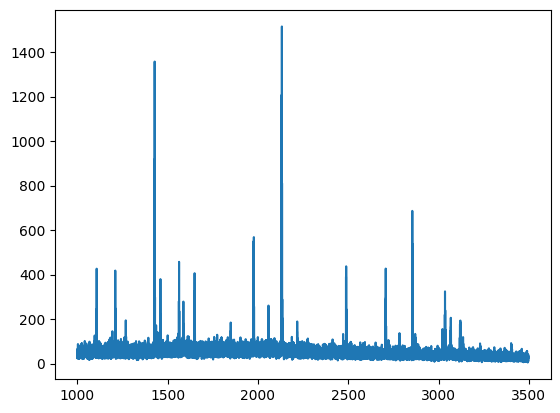

In [ ]:
final_df.drop('species',1).iloc[0].plot()

<ipython-input-16-feba2ee74437>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  final_df.drop('species',1).iloc[100].plot()


<Axes: >

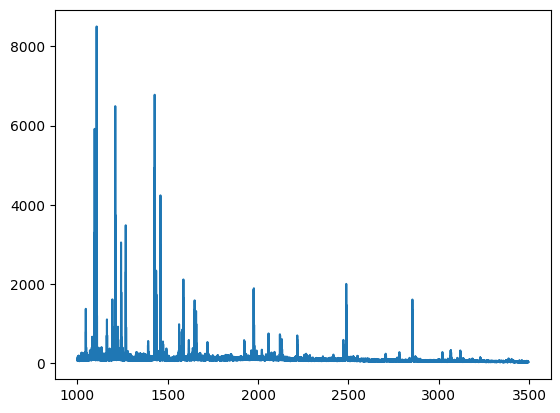

In [ ]:
final_df.drop('species',1).iloc[100].plot()

In [ ]:
final_df.groupby('species').mean().plot()

<Axes: xlabel='species'>

Error in callback <function _draw_all_if_interactive at 0x797a63f65120> (for post_execute):


KeyboardInterrupt: ignored

ValueError: ignored

<Figure size 640x480 with 1 Axes>